# European Option Pricing

A European option is a version of an options contract that can only be exercised at the time of expiration date. By contrast, An American option gives the right not obligation to buy or sell an option at any time before the expiry. The two nomenclatures have no geographical relations. In this submission, we will draw attention to European options.

There exists European Call and Put options.

**Call option gives the owner the right to acquire some underlying security at expiry.

**Put option allows the holder to sell the underlying security at expiry.

1. Given Data 

Parameters of Group 25

$u = 1.1 + \frac{25}{100} = 1.35$

$d = \frac{1}{u} = 0.74$

$p^* = \frac{1 - d}{u - d} = 0.4255$

In [1]:
S = 95  #initial underlying asset price
K = 105 #strike price
t = 1.0 #time to expiry
v = 0.0 #sigma, volatility
n = 3 #number of steps
r = 0.0 #risk-free interest rate
T = t * n
u = 1.35
d = 1 / u
At = t / n 
p = (1 - d) / (u - d) 

 2. Important definitions

In [2]:
from math import exp
import pandas as pd
import numpy as np
import math as m

In [3]:

def Stock_values(n, S, t):  
    #Binomial price tree
    stockvalue = np.zeros((n+1, n+1))
    stockvalue[0,0] = S
    for j in range(1, n+1):
        for i in range(j+1):
            stockvalue[i,j] = S*m.pow(d,i)*m.pow(u,j-i)
    return stockvalue
def Call_values(n, S, t, K):  
    callvalue = np.zeros((n+1, n+1))
    for j in range(1, n+1):
        for i in range(j+1):
            callvalue[i,j] = max(S*m.pow(d,i)*m.pow(u,j-i) - K, 0) # Call = S-k
    return callvalue
def Put_values(n2, S, t, K):  
    putvalue = np.zeros((n+1, n+1))
    for j in range(1, n+1):
        for i in range(j+1):
            putvalue[i,j] = max(K- S*m.pow(d,i)*m.pow(u,j-i), 0) # Put = k-S
    return putvalue

3. Binomial model

In [4]:
def binomial(S,K,T,r,u,d,n,put=False,am=True):
    list=[];values=[]
    pos=-1 if put==True else 1
    for m in range(n+1):
        st=S*(u**(m))*(d**(n-m)) 
        values.append(max(pos*(st-K),0)) 
        for i in range(m+1):  
            st=S*(u**(m-i))*(d**i)
            if n<10: list.append(f's0*u^{m-i}(d^{i})={round(st,2)}')
            elif n>=10: list.append(round(st,2))
            elif n>=38: list.append(round(st,1))
    for k in range(n-1,-1,-1): 
        for i in range(k+1):
            if am: values[i]=max(pos*(S*u**i*d**(k-i)-K),exp(-r*t)*(p*values[i+1]+(1-p)*values[i]))
            else: values[i]=exp(-r*t)*(p*values[i+1]+(1-p)*values[i]) 
    if put:            
        put= round(values[0],2)
        call=round(put-K*exp(-r*T)+S,2)
        if am:
            print(f"Call Option Value________{call}")
            print(f"Put Option Value_________{put}")

        else:
            print(f"Put-Call parity Check____{put+S} = {call+K*exp(-r*T)}")
            print(f"Call Option Value________{call}")
            print(f"Put Option Value_________{put}")
    else:  
        call=round(values[0],2)
        put=round(call+K*exp(-r*T)-S,2)
        print(f"Put-Call parity Check ____{put+S} = {call+K*exp(-r*T)}")
        print(f"Call Option Value_________{call}")
        print(f"Put Option Value__________{put}")
    return list

# The Price of European Call Option; N=3

**a. S = 95 USD, K = 105 USD, t = 1 year, r = 0, n = 3, u = 1.35, d = 1/u.**

In [5]:
Option=binomial(S,K,T,r,u,d,n,put=False,am=False)

Put-Call parity Check ____122.18 = 122.18
Call Option Value_________17.18
Put Option Value__________27.18


The return value should specifically be **Call Option Value, however in order to verify the certainty,
1. We need to perform a Put-Call parity check
2. We need to see if the difference between Call value and Put value is the same as the difference between stock and strike prices.

            **|S0-K|= Put-Call = 105-95 = 10

**b. Using the information from (a), show the value of the derivative, 𝐻(𝜔), for each of the paths**

T_V --------Terminal Value<br>
uu ---------Up Up<br>
ud ---------Up Down<br>
du ---------Down Up<br>
dd -------- Down Down<br>

In [6]:
dfS=pd.DataFrame(Stock_values(n, S, t))
dfS.rename(columns={3:"T_V"}, inplace = True)
dfS.round(2)

,0,1,2,T_V
0,95.0,128.25,173.14,233.74
1,0.0,70.37,95.00,128.25
2,0.0,0.00,52.13,70.37
3,0.0,0.00,0.00,38.61


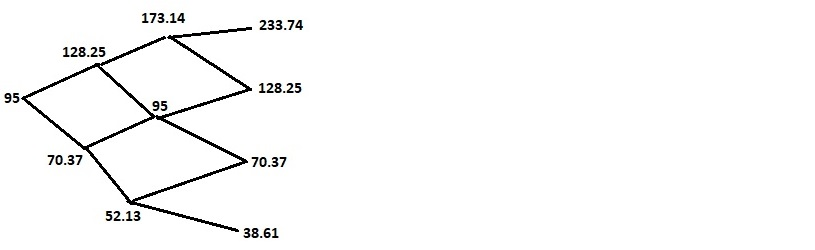

<br><br><br>From the definition of European call option

$ H=(X_T-K) = \begin{cases} X_T-K & X_T > K\\ 0 & X_T \leq K \end{cases}$

<br>
<br>
uuu: $H(\omega)=233.74-105=128.74$<br>
uud, udu, duu: $H(\omega)=128.25-105=23.25$<br>
udd, dud, ddu: $H(\omega)=0,$   for $ 70.37<105 $<br>
ddd: $H(\omega)=0,$   for $38.61<105 $<br>

We will use the convention $u^kd^j$ to denote the event having $k$ up movements and $j$ down movements.

By calculations, European call option is

$\pi_C=\mathbb{E}^*(H(\omega))=\Sigma_{\omega}\mathbb{P}^*(\omega) \cdot H(\omega) = H(u^3d^0) \cdot \mathbb{P}^*(u^3d^0) \cdot {3 \choose 0} + H(u^2d^1) \cdot \mathbb{P}^*(u^2d^1) \cdot {3 \choose 1} =
128.74 \cdot 0.4255^3 \cdot 1 + 23.12 \cdot 0.4255^2 \cdot (1-0.4255) \cdot 3 =17.18 $

# The Price of European Put Option; N=2

**a. S = 95 USD, K = 105 USD, t = 1 year, r = 0, n = 2, u = 1.35, d = 1/u.**

In [7]:
S = 95  #initial underlying asset price
K = 105 #strike price
t = 1.0 #time to expiry
v = 0.0 #sigma, volatility
n = 2 #number of steps
r = 0.0 #risk-free interest rate
T=t*n
u = 1.35
d = 1/u
At = t/n 
p = (1-d)/(u-d) 

In [8]:
Option=binomial(S,K,T,r,u,d,n,put=False,am=False)

Put-Call parity Check ____117.34 = 117.34
Call Option Value_________12.34
Put Option Value__________22.34


The return value should specifically be **Put Option Value, however in order to verify the certainty,
1. We need to perform a Put-Call parity check
2. We need to see if the difference between Call value and Put value is the same as the difference between stock and strike prices.

            **|S0-K|= Put-Call = 105-95 = 10

In [9]:
dfS=pd.DataFrame(Stock_values(n, S, t))
dfS.rename(columns={2:"T_V"}, inplace = True)
dfS.round(2)

,0,1,T_V
0,95.0,128.25,173.14
1,0.0,70.37,95.00
2,0.0,0.00,52.13


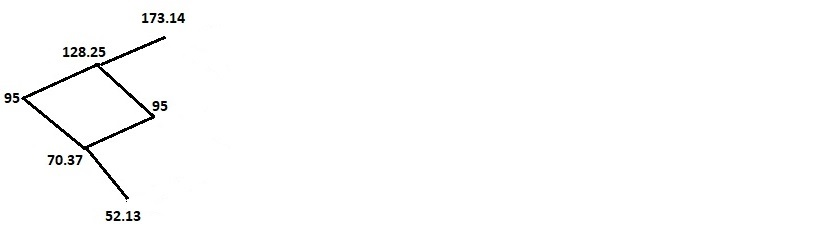

From the definition of European Put option

$ H'=(K-X_T) = \begin{cases} K-X_T & K > X_T\\ 0 & K \leq X_T \end{cases}$

<br>
<br>
uu, $H'(ω)=0,$   for $ 173.14>105 $<br>
ud, du, $H'(ω)=105-95=10$<br>
dd, $H'(ω)=105-52.13=52.87 $<br>

By calculations, European Put option is:

$\pi_P=\mathbb{E}^*(H(\omega))=\Sigma_{\omega}\mathbb{P}^*(\omega) \cdot H(\omega) = H(u^1d^1) \cdot \mathbb{P}^*(u^1d^1) \cdot {2 \choose 1} + H(u^2d^1) \cdot \mathbb{P}^*(u^0d^2) \cdot {2 \choose 2} = $<br/>
$10 \cdot 0.4255 \cdot (1 - 0.4255) \cdot 2 + 52.87 \cdot (1 - 0.4255)^2 \cdot 1 = 22.34 $

**b. Table Construction**

$π_p = V_0(φ)$ <br>
Provided that, φ is a self replicating strategy,<br>
$V^H_t$ = $π(H)+ \sum_{k=1}^{t}  φ^H_k(X_k-X_(k-1))\$, <br>

Where
$ V^H_T=E^*(H|\mathcal{F}_T)=H $   and $ V_H $ is the value of replicating strategy, 𝜑 

<br><br><br><br><br> If we construct new tree diagram according to replicating strategy,
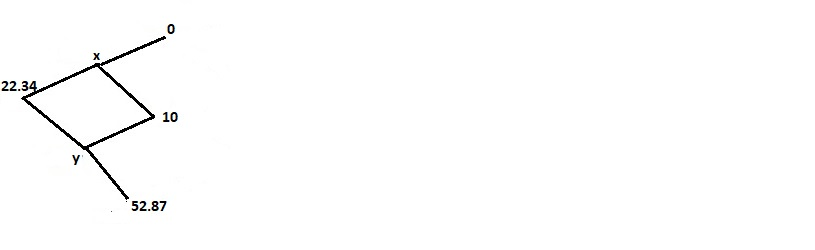

Then, the values of x and y can be calculated as <br>
**1. uu & ud is $x=0+10*(1-0.4255)=5.745$ which is $V^H_1$  at upward** and <br>
**2. du & dd id $y=10*0.4255+52.87*(1-0.4255)=34.63$  which is $V^H_1$ at downward**<br><br>
The values of V can be summarized in the following table:


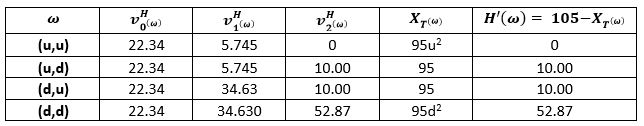

The hedging strategy can be summarized as

$ 𝜑^T_H = \frac{V^H_t-V^H_(t-1)}{X_t-X_(t-1)}$

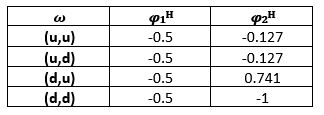

# Market Completeness Revisited

Let us take the first node having $X_0 = 95$. We assume the bond has a constant price of $1$. Therefore, we have:

$
A=
  \begin{bmatrix}
    X_0 \cdot u & 1 \\
    X_0 \cdot d & 1
  \end{bmatrix}
  =\begin{bmatrix}
    128.25 & 1 \\
    70.37 & 1
  \end{bmatrix}
$

$
b=
  \begin{bmatrix}
    \nu_1^H(u, u) \\
    \nu_1^H(d, u)
  \end{bmatrix}
  =
  \begin{bmatrix}
    \nu_1^H(u, d) \\
    \nu_1^H(d, d)
  \end{bmatrix}
  = 
  \begin{bmatrix}
    5.745 \\
    34.63
  \end{bmatrix}
$

Solving $A \cdot x = b$ gives us:

$x= A^-1 \cdot b =
  \begin{bmatrix}
    -0.5 \\
    69.75
  \end{bmatrix}$
  
The first element, $-0.5$, **coincides with the value of $\phi_1^H$ obtained in the previous step**, as expected. It represents the amount of shares we should hold in a replicating strategy. The second values represents the amount of bond units (or cash) that should be held.

In [10]:
A = np.array([[128.25, 1], [70.37, 1]])
b = np.array([5.745, 34.63]).reshape(-1, 1)
x = np.dot(np.linalg.inv(A), b)
x.round(2)

array([[-0.5 ],
       [69.75]])

# Put Call Parity

We assume the risk-free rate has the constant value of 0. We use $X^T$ to denote the value of the stock at the option expiration time $T$, and $K$ to denote the strike price. The value of the call is $H^C$ and of the put is $H^P$. 

Therefore the first portfolio will have final value $H^1 = H^C - H^P$.

The second portfolio is independent of the state of the world and has final value $H^2 = X^T - K$. Note that if the risk-free rate is taken to be greater than 0, the final value of $H^2$ changes, and includes a term for the interest accrued on the borrowed money.

Let us analyse the 3 states of the world for the options:

1. Final stock price > Strike

If $X^T > K$, then $H^C = X^T - K$, and $H^P = 0$ (the put expires worthless, whereas the call is in the money). Therefore $H^1 = H^C - H^P = X^T - K$.

2. Final stock price = Strike

If $X^T = K$, we have $H^C = X^T - K = 0 = K - X^T = H^P$, so $H^1 = 0 = X^T - K$.

3. Final stock price < Strike

If $X^T < K$, then $H^C = 0$, and $H^P = K - X^T$ (the call expires worthless, whereas the put is in the money). Therefore $H^1 = H^C - H^P = -(K - X^T) = X^T - K$.

In all 3 states of the world, we have:

$H^1 = H^2 = X^T - K$, therefore the 2 portfolios satisfy put-call parity.


**In real practices, there would be a discrepancy between the 2 portfolios if the risk free rate would not be 0. That discrepancy would be equal to the interest accrued.**